# Projeto Ciencia de Dados: Carteira de Ações com Inteligência Artificial

- Projeto Inspiração: https://medium.com/swlh/teaching-a-machine-to-trade-stocks-like-warren-buffett-part-i-445849b208c6
- Resumo Fundamentos Empresas BR: https://fundamentus.com.br/index.php

### Criar Dicionários de Dataframes com cada empresa

In [592]:
! pip install pandas
! pip install xlrd
! pip install openpyxl
! pip install yfinance
! pip install plotly
! pip install seaborn
! pip install nbformat
! pip install scikit-learn


In [593]:
import pandas as pd
import os

companies = ["ABEV3", "AZUL4", "BTOW3", "B3SA3", "BBSE3", "BRML3", "BBDC4", "BRAP4", "BBAS3", "BRKM5", "BRFS3", "BPAC11", "CRFB3", "CCRO3", "CMIG4", "HGTX3", "CIEL3", "COGN3", "CPLE6", "CSAN3", "CPFE3", "CVCB3", "CYRE3", "ECOR3", "ELET6", "EMBR3", "ENBR3", "ENGI11", "ENEV3", "EGIE3", "EQTL3", "EZTC3", "FLRY3", "GGBR4", "GOAU4", "GOLL4", "NTCO3", "HAPV3", "HYPE3", "IGTA3", "GNDI3", "ITSA4", "ITUB4", "JBSS3", "JHSF3", "KLBN11", "RENT3", "LCAM3", "LAME4", "LREN3", "MGLU3", "MRFG3", "BEEF3", "MRVE3", "MULT3", "PCAR3", "PETR4", "BRDT3", "PRIO3", "QUAL3", "RADL3", "RAIL3", "SBSP3", "SANB11", "CSNA3", "SULA11", "SUZB3", "TAEE11", "VIVT3", "TIMS3", "TOTS3", "UGPA3", "USIM5", "VALE3", "VVAR3", "WEGE3", "YDUQ3"]
# fundamentos = {
#     "ABEV3": balanco_dre_abev3,
#     "MGLU3": balanco_dre_mglu3
# }
fundaments = {}
files = os.listdir("balancos")
for file in files:
    
    company = file.split('_')[1].split('.')[0]

    if company in companies:
        
        # get the balance from each company
        balance = pd.read_excel(f'balancos/{file}', sheet_name=0)

        # na primeira coluna colocar o título com o nome da empresa
        balance.iloc[0, 0] = company

        # make the first line the heading
        balance.columns = balance.iloc[0]
        balance = balance[1:]

        # tornar a 1ª coluna (que agora tem o nome da emrpesa)
        balance = balance.set_index(company)
        dre = pd.read_excel(f'balancos/{file}', sheet_name=1)

        # na primeira coluna colocar o título com o nome da empresa
        dre.iloc[0, 0] = company

        # pegar 1ª linha e tornar um cabeçalho
        dre.columns = dre.iloc[0]
        dre = dre[1:]
        
        # tornar a 1ª coluna (que agora tem o nome da emrpesa)
        dre = dre.set_index(company)

        fundaments[company] = pd.concat([balance, dre])

WARNING *** file size (66667) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (66667) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64284) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64284) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64282) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64282) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (24947) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

### Pegar Preços das Ações nas Datas Correspondentes

In [594]:
stock_values_df = pd.read_excel("StockInfo.xlsx")
stock_values = {}
for company in stock_values_df["Empresa"].unique():
    stock_values[company] = stock_values_df.loc[stock_values_df['Empresa']==company, :]

In [595]:
print(len(stock_values))

77


### Remover empresas que tem cotações vazias da análise (mesmo após o tratamento que fizemos na hora de pegar as cotações)

In [596]:
for company in companies:
    if stock_values[company].isnull().values.any():
        stock_values.pop(company)
        fundaments.pop(company)
companies = list(stock_values.keys())
print(len(companies))

65


### Juntar fundamentos com Preço da Ação

In [597]:
# no cotacoes: jogar as datas para índice
# no fundamnetos:
    # trocar linhas por colunas
    # tratar as datas para formato de data do python
    # juntar os fundamentos com a coluna Adj Close das cotacoes
for company in fundaments:
    table = fundaments[company].T
    table.index = pd.to_datetime(table.index, format="%d/%m/%Y")
    stock_data_table = stock_values[company].set_index("Date")
    stock_data_table = stock_data_table[["Adj Close"]]
    
    table = table.merge(stock_data_table, right_index=True, left_index=True)
    table.index.name = company
    fundaments[company] = table
display(fundaments["ABEV3"])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Receitas,Despesas,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Participações/Contribuições Estatutárias,Reversão dos Juros sobre Capital Próprio,Part. de Acionistas Não Controladores,Lucro/Prejuízo do Período,Adj Close
ABEV3,,,,,,,,,,,,,,,,,,,,,
2020-12-31,125196574.72,35342614.528,17090335.744,1700028.032,4303137.792,7605904.896,0,3287141.888,293552,1062513.984,...,NaN,NaN,8464308.224,93644,-1667579.008,NaN,NaN,-104363.008,6786009.6,15.575767
2020-09-30,127056781.312,39098793.984,21660450.816,1442923.008,4156922.88,7341836.8,0,3472880.896,298303.008,725478.976,...,NaN,NaN,2431040,-415548,343476,NaN,NaN,-84167,2274800.896,12.159024
2020-06-30,121393004.544,36268126.208,17438951.424,44823,4201583.104,7771618.816,0,5390340.096,356411.008,1064401.984,...,NaN,NaN,1108173.056,-431944.992,595088,NaN,NaN,-44517,1226798.976,13.710416
2020-03-31,113687560.192,31086356.48,13204471.808,44823,3394298.112,7752655.872,0,5266407.936,447473.984,976225.024,...,NaN,NaN,1490919.936,-295032.992,15365,NaN,NaN,-119468,1091783.936,11.557861
2019-12-31,101742944.256,27621136.384,11900665.856,14558,4495524.864,5978556.928,0,4074127.104,512532,645171.968,...,NaN,NaN,3755047.68,1317924.992,-853995.008,NaN,NaN,-119273.008,4099704.832,18.102791
2019-09-30,102475317.248,29004025.856,15016913.92,14304,4236257.024,5978811.904,0,2545863.936,293060,918814.976,...,NaN,NaN,2826416.896,-649270.016,427238.016,NaN,NaN,-106708,2497677.056,18.187490
2019-06-30,98738978.816,27356035.072,14233403.392,14038,4103118.08,6197564.928,0,1542556.032,507216,758140.992,...,NaN,NaN,2980011.008,-807523.968,443414.016,NaN,NaN,-95168,2520732.928,16.902554
2019-03-31,96905535.488,26194137.088,12822524.928,13772,3980359.936,6032743.936,0,1980342.016,591273.984,773121.024,...,NaN,NaN,3381529.088,-979185.024,346724,NaN,NaN,-87218,2661850.112,15.901062
2018-12-31,94126137.344,25329604.608,11463497.728,13391,4879256.064,5401793.024,0,2148713.984,741222.016,681731.008,...,NaN,NaN,4591409.152,33055.072,-1160932.992,NaN,NaN,-103125.992,3360404.736,14.531096


### Tratar colunas
    
1. Vamos pegar apenas empresas que possuem as mesmas colunas
2. Ajeitar colunas com nome repetido
3. Analisar valores vazios nas colunas

#### 1. Remover da análise tabelas que tem colunas diferentes

In [598]:
columns = list(fundaments["ABEV3"].columns)

for company in companies:
    if set(columns) != set(fundaments[company].columns):
        fundaments.pop(company)
print(len(fundaments))

61


####  2. Ajeitando colunas com o mesmo nome

In [599]:
columns2 = columns
columns_text = ";".join(columns2)

modified_columns = []
for column in columns2:
    if columns2.count(column) == 2 and column not in modified_columns:
        columns_text = columns_text.replace(";" + column + ";",";" + column + "_1;", 1)
        modified_columns.append(column)
columns2 = columns_text.split(';')
print(columns2)

['Ativo Total', 'Ativo Circulante', 'Caixa e Equivalentes de Caixa', 'Aplicações Financeiras', 'Contas a Receber_1', 'Estoques_1', 'Ativos Biológicos_1', 'Tributos a Recuperar', 'Despesas Antecipadas_1', 'Outros Ativos Circulantes', 'Ativo Realizável a Longo Prazo', 'Aplicações Financeiras Avaliadas a Valor Justo', 'Aplicações Financeiras Avaliadas ao Custo Amortizado', 'Contas a Receber', 'Estoques', 'Ativos Biológicos', 'Tributos Diferidos_1', 'Despesas Antecipadas', 'Créditos com Partes Relacionadas', 'Outros Ativos Não Circulantes', 'Investimentos', 'Imobilizado', 'Intangível', 'Diferido', 'Passivo Total', 'Passivo Circulante', 'Obrigações Sociais e Trabalhistas', 'Fornecedores', 'Obrigações Fiscais', 'Empréstimos e Financiamentos_1', 'Passivos com Partes Relacionadas_1', 'Dividendos e JCP a Pagar', 'Outros_1', 'Provisões_1', 'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados_1', 'Passivo Não Circulante', 'Empréstimos e Financiamentos', 'Passivos com Partes Relacionadas'

In [600]:
# implementar as colunas nas tabelas

for company in fundaments:
    fundaments[company].columns = columns2

#### 3. Analisar valores vazios nas colunas

In [601]:
# valores_vazios = {
#     "Ativo Total": 0,
#     "Passivo Total": 0,
# }
null_values = dict.fromkeys(columns2, 0)
n_rows = 0
for company in fundaments:
    table = fundaments[company]
    n_rows += table.shape[0]
    for column in columns2:
        n_null = pd.isnull(table[column]).sum()
        null_values[column] += n_null
print(null_values)
print(n_rows)

{'Ativo Total': 0, 'Ativo Circulante': 0, 'Caixa e Equivalentes de Caixa': 0, 'Aplicações Financeiras': 0, 'Contas a Receber_1': 0, 'Estoques_1': 0, 'Ativos Biológicos_1': 0, 'Tributos a Recuperar': 0, 'Despesas Antecipadas_1': 0, 'Outros Ativos Circulantes': 0, 'Ativo Realizável a Longo Prazo': 0, 'Aplicações Financeiras Avaliadas a Valor Justo': 0, 'Aplicações Financeiras Avaliadas ao Custo Amortizado': 0, 'Contas a Receber': 0, 'Estoques': 0, 'Ativos Biológicos': 0, 'Tributos Diferidos_1': 0, 'Despesas Antecipadas': 0, 'Créditos com Partes Relacionadas': 0, 'Outros Ativos Não Circulantes': 0, 'Investimentos': 0, 'Imobilizado': 0, 'Intangível': 0, 'Diferido': 0, 'Passivo Total': 0, 'Passivo Circulante': 0, 'Obrigações Sociais e Trabalhistas': 0, 'Fornecedores': 0, 'Obrigações Fiscais': 0, 'Empréstimos e Financiamentos_1': 0, 'Passivos com Partes Relacionadas_1': 0, 'Dividendos e JCP a Pagar': 0, 'Outros_1': 0, 'Provisões_1': 0, 'Passivos sobre Ativos Não-Correntes a Venda e Descontin

In [602]:
remove_columns = []
for column in null_values:
    if null_values[column] > 50:
        remove_columns.append(column)

for company in fundaments:
    fundaments[company] = fundaments[company].drop(remove_columns, axis=1)
    fundaments[company] = fundaments[company].ffill()

In [603]:
fundaments["ABEV3"].shape

(33, 72)

### Criando os rótulos: Comprar, Não Comprar ou Vender?

Não queremos saber quando vender, mas inclui essa categoria para conseguir identificar quando que o nosso modelo vai sugerir uma compra quando na verdade o melhor momento era vender. Isso significa que o modelo errou "mais" do que quando sugeriu comprar e simplesmente o certo era não comprar

Regra: 
1. Subiu mais do que o Ibovespa (ou caiu menos) -> Comprar (Valor = 2)
2. Subiu menos do que o Ibovespa até Ibovespa - 2% (ou caiu mais do que Ibovespa até Ibovespa -2%) -> Não Comprar (Valor = 1)
3. Subiu menos do que o Ibovespa - 2% (ou caiu mais do que Ibovespa -2%) -> Vender (Valor = 0)

In [604]:
import yfinance as yf
ibovespa = yf.Ticker('^BVSP')
ibov_df = ibovespa.history(start = '2012-12-20', end = '2021-04-20')
ibov_df.index = [pd.Timestamp(str(date).split(' ')[0]) for date in ibov_df.index]

In [605]:
ibov_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2012-12-20,60992.0,61276.0,60622.0,61276.0,3083400,0.0,0.0
2012-12-21,61271.0,61271.0,60221.0,61007.0,3157400,0.0,0.0
2012-12-26,61003.0,61322.0,60861.0,60960.0,2598000,0.0,0.0
2012-12-27,60964.0,61191.0,60233.0,60416.0,2852600,0.0,0.0
2012-12-28,60416.0,61066.0,60416.0,60952.0,2626000,0.0,0.0
...,...,...,...,...,...,...,...
2021-04-13,118809.0,119529.0,118041.0,119297.0,8977600,0.0,0.0
2021-04-14,119298.0,120871.0,119298.0,120295.0,10076600,0.0,0.0
2021-04-15,120290.0,121409.0,120084.0,120701.0,7948100,0.0,0.0
2021-04-16,120701.0,121333.0,120199.0,121114.0,7945600,0.0,0.0


In [606]:
import numpy as np

dates = fundaments["ABEV3"].index
for date in dates:
    if date not in ibov_df.index:
        ibov_df.loc[date] = np.nan
ibov_df.sort_index(inplace=True)
ibov_df.ffill(inplace=True)
ibov_df.rename(columns={"Close": "IBOV"},inplace=True)
for company in fundaments:
    fundaments[company] = fundaments[company].merge(ibov_df[['IBOV']], left_index=True, right_index=True)
display(fundaments["ABEV3"])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Ativos Biológicos_1,Tributos a Recuperar,Despesas Antecipadas_1,Outros Ativos Circulantes,...,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV
2020-12-31,1.251966e+08,3.534261e+07,1.709034e+07,1700028.032,4303137.792,7605904.896,0,3287141.888,293552.000,1062513.984,...,-9428,1040928.960,2144160.000,-1103231.104,8464308.224,93644.000,-1667579.008,6786009.600,15.575767,119306.0
2020-09-30,1.270568e+08,3.909879e+07,2.166045e+07,1442923.008,4156922.880,7341836.800,0,3472880.896,298303.008,725478.976,...,-11002,-1144775.936,369476.992,-1514253.056,2431040.000,-415548.000,343476.000,2274800.896,12.159024,94603.0
2020-06-30,1.213930e+08,3.626813e+07,1.743895e+07,44823.000,4201583.104,7771618.816,0,5390340.096,356411.008,1064401.984,...,-16237,-793734.976,236606.000,-1030340.992,1108173.056,-431944.992,595088.000,1226798.976,13.710416,95056.0
2020-03-31,1.136876e+08,3.108636e+07,1.320447e+07,44823.000,3394298.112,7752655.872,0,5266407.936,447473.984,976225.024,...,-6617,-1536866.944,245776.000,-1782642.944,1490919.936,-295032.992,15365.000,1091783.936,11.557861,73020.0
2019-12-31,1.017429e+08,2.762114e+07,1.190067e+07,14558.000,4495524.864,5978556.928,0,4074127.104,512532.000,645171.968,...,-11195,-1564263.936,234065.056,-1798328.832,3755047.680,1317924.992,-853995.008,4099704.832,18.102791,115964.0
2019-09-30,1.024753e+08,2.900403e+07,1.501691e+07,14304.000,4236257.024,5978811.904,0,2545863.936,293060.000,918814.976,...,-8248,-305798.016,867204.992,-1173003.008,2826416.896,-649270.016,427238.016,2497677.056,18.187490,104745.0
2019-06-30,9.873898e+07,2.735604e+07,1.423340e+07,14038.000,4103118.080,6197564.928,0,1542556.032,507216.000,758140.992,...,-731,-567436.992,249903.008,-817340.032,2980011.008,-807523.968,443414.016,2520732.928,16.902554,100967.0
2019-03-31,9.690554e+07,2.619414e+07,1.282252e+07,13772.000,3980359.936,6032743.936,0,1980342.016,591273.984,773121.024,...,-2136,-672067.968,287692.992,-959761.024,3381529.088,-979185.024,346724.000,2661850.112,15.901062,95415.0
2018-12-31,9.412614e+07,2.532960e+07,1.146350e+07,13391.000,4879256.064,5401793.024,0,2148713.984,741222.016,681731.008,...,1140,-1618994.944,19940.992,-1638935.808,4591409.152,33055.072,-1160932.992,3360404.736,14.531096,87887.0
2018-09-30,9.569104e+07,2.620002e+07,1.222767e+07,13008.000,4285633.024,5349087.232,0,2215026.944,439839.008,1669756.032,...,-3272,-611080.000,245288.992,-856369.024,2754401.024,-475184.992,612889.984,2831159.040,16.978544,79342.0


In [607]:
# tornar os nossos indicadores em percentuais
# fundamento%tri = fundamento tr / fundamento tri anterior
# cotacao%tri = cotacao tri seguinte / cotacao tri
for company in fundaments:
    fundament = fundaments[company]
    fundament = fundament.sort_index()
    for column in fundament:
        if "Adj Close" in column or "IBOV" in column:
            pass
        else:
            # pegar a cotação anterior
            condicoes = [
                (fundament[column].shift(1) > 0) & (fundament[column] < 0),
                (fundament[column].shift(1) < 0) & (fundament[column] > 0),
                (fundament[column].shift(1) < 0) & (fundament[column] < 0),
                (fundament[column].shift(1) == 0) & (fundament[column] > 0),
                (fundament[column].shift(1) == 0) & (fundament[column] < 0),
                (fundament[column].shift(1) < 0) & (fundament[column] == 0),
            ]
            valores = [
                -1,
                1,
                (abs(fundament[column].shift(1)) - abs(fundament[column])) / abs(fundament[column].shift(1)),
                1,
                -1,
                1,
            ]
            fundament[column] = np.select(condicoes, valores, default=fundament[column] / fundament[column].shift(1) - 1)
    # pegar cotação seguinte
    fundament["Adj Close"] = fundament["Adj Close"].shift(-1) / fundament["Adj Close"] - 1
    fundament["IBOV"] = fundament["IBOV"].shift(-1) / fundament["IBOV"] - 1
    fundament["Resultado"] = fundament["Adj Close"] - fundament["IBOV"]
    condicoes = [
        (fundament["Resultado"] > 0),
        (fundament["Resultado"] < 0) & (fundament["Resultado"] >= -0.02),
        (fundament["Resultado"] < -0.02)
    ]
    valores = [2, 1, 0]
    fundament["Decisao"] = np.select(condicoes, valores)
    
    fundaments[company] = fundament

In [608]:
fundaments['ABEV3']

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Ativos Biológicos_1,Tributos a Recuperar,Despesas Antecipadas_1,Outros Ativos Circulantes,...,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV,Resultado,Decisao
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.013860,-0.075469,0.061609,2
2013-03-31,-0.004402,0.082509,0.540941,NaN,-0.855514,NaN,NaN,-0.878257,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.011719,-0.157847,0.169566,2
2013-06-30,42.823044,154.470551,59.403415,1.000000,895.341086,1.000000,NaN,3040.654255,1.000000,1.000000,...,68.350400,-1.000000,240.798915,-3992.348051,1.000000,115.885753,0.029640,0.102851,-0.073211,0
2013-09-30,0.014976,0.034944,0.078755,0.259921,-0.012680,-0.051246,NaN,0.150925,-0.053987,0.184512,...,0.425526,-0.705429,0.312139,0.413319,-1.000000,1.005453,0.022673,-0.015878,0.038551,2
2013-12-31,0.151882,0.640439,1.334113,-0.528801,0.315030,0.080784,NaN,0.642232,0.326698,0.198435,...,2.318989,-1.081397,1.589715,-1.460893,0.573658,1.661370,-0.012411,-0.021201,0.008790,2
2014-03-31,-0.078297,-0.201158,-0.353510,0.421231,-0.139316,0.095442,NaN,0.016833,-0.133515,0.226973,...,-0.662614,0.593060,-0.616634,-0.048470,1.000000,-0.582090,-0.066860,0.054607,-0.121467,0
2014-06-30,-0.004866,-0.035410,-0.140116,-0.073713,0.137713,0.018993,NaN,0.063286,-0.189384,0.071060,...,0.329060,0.004367,-0.215038,0.699624,-0.923330,-0.149121,0.027849,0.017830,0.010019,2
2014-09-30,0.033925,-0.020712,-0.083799,0.386513,-0.074255,0.012343,NaN,0.129495,-0.024556,0.237706,...,0.250902,0.013409,0.323985,-1.989595,14.392936,0.298455,0.030113,-0.075929,0.106043,2
2014-12-31,0.107749,0.341943,0.691348,0.353403,-0.075340,0.079871,NaN,-0.072745,0.448937,2.030331,...,-0.001110,-0.646470,0.673428,1.000000,-1.000000,0.613021,0.219934,0.022857,0.197077,2
2015-03-31,0.041002,-0.071757,-0.282603,0.449956,-0.043301,0.283355,NaN,-0.118599,-0.102662,0.249493,...,-0.157968,0.171903,-0.285186,-1.000000,0.967386,-0.380692,0.033152,0.037752,-0.004600,1


In [609]:
columns = list(fundaments["ABEV3"].columns)
null_values = dict.fromkeys(columns, 0)
n_rows = 0
for company in fundaments:
    table = fundaments[company]
    n_rows += table.shape[0]
    for coluna in columns:
        n_null = pd.isnull(table[coluna]).sum()
        null_values[coluna] += n_null
print(null_values)
print(n_rows)

{'Ativo Total': 61, 'Ativo Circulante': 61, 'Caixa e Equivalentes de Caixa': 61, 'Aplicações Financeiras': 623, 'Contas a Receber_1': 65, 'Estoques_1': 483, 'Ativos Biológicos_1': 1874, 'Tributos a Recuperar': 266, 'Despesas Antecipadas_1': 1059, 'Outros Ativos Circulantes': 281, 'Ativo Realizável a Longo Prazo': 61, 'Aplicações Financeiras Avaliadas a Valor Justo': 1581, 'Aplicações Financeiras Avaliadas ao Custo Amortizado': 1661, 'Contas a Receber': 937, 'Estoques': 1434, 'Ativos Biológicos': 1823, 'Tributos Diferidos_1': 822, 'Despesas Antecipadas': 1130, 'Créditos com Partes Relacionadas': 1271, 'Outros Ativos Não Circulantes': 426, 'Investimentos': 345, 'Imobilizado': 62, 'Intangível': 86, 'Diferido': 2004, 'Passivo Total': 61, 'Passivo Circulante': 61, 'Obrigações Sociais e Trabalhistas': 390, 'Fornecedores': 153, 'Obrigações Fiscais': 102, 'Empréstimos e Financiamentos_1': 85, 'Passivos com Partes Relacionadas_1': 1476, 'Dividendos e JCP a Pagar': 763, 'Outros_1': 113, 'Provisõ

In [610]:
remove_columns = []
for column in null_values:
    if null_values[column] > (n_rows/3):
        remove_columns.append(column)

for company in fundaments:
    fundaments[company] = fundaments[company].drop(remove_columns, axis=1)
    fundaments[company].ffill(inplace=True)
    #fundaments[company].dropna(inplace=True)
    fundaments[company].ffill(inplace=True)
    fundaments[company].ffill(inplace=True)
    fundaments[company].ffill(inplace=True)
    fundaments[company].ffill(inplace=True)
    fundaments[company].ffill(inplace=True)
    fundaments[company].ffill(inplace=True)
    fundaments[company].ffill(inplace=True)
    fundaments[company].ffill(inplace=True)
    fundaments[company].ffill(inplace=True)
    fundaments[company].ffill(inplace=True)



In [611]:
for company in fundaments:
    fundaments[company] = fundaments[company].drop(["Adj Close", "IBOV", "Resultado"], axis=1)
print(fundaments["ABEV3"].shape)

(33, 47)


### Hora de tornar tudo 1 dataframe só

In [612]:
fundaments_copy = fundaments.copy()

In [613]:
db = pd.DataFrame()
for company in fundaments_copy:
    fundaments_copy[company] = fundaments_copy[company][1:-1]
    fundaments_copy[company] = fundaments_copy[company].reset_index(drop=True)
    db = pd.concat([db, (fundaments_copy[company])])
display(db)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Outros Ativos Não Circulantes,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Decisao
0,0.006519,0.016469,0.567359,-0.234385,0.038335,-0.014487,0.108111,0.073416,0.053858,0.108915,...,-1.000000,-1.000000,0.397405,1.222821,0.068693,0.784128,0.057931,-0.773432,0.714242,2
1,0.005025,0.558803,-0.495118,-0.075808,-0.137144,-0.269828,-0.246450,21.051236,-0.288000,-0.292028,...,-1.000000,-7.355691,-1.348700,-0.175641,-0.610568,-6.964708,1.000000,4.112195,-4.169923,0
2,-0.306583,-0.499544,0.592010,-0.179654,0.116088,-0.004228,0.029736,-0.954322,-0.005642,0.004897,...,-1.000000,0.316711,0.430909,0.483034,0.204388,0.649179,-1.000000,-0.651179,0.216400,0
3,-0.006799,-0.076635,-0.334499,-0.206399,0.088251,-0.056164,0.041095,0.088899,0.068368,0.035394,...,-1.000000,0.395870,0.284087,-0.725268,0.487911,0.540194,-4.795674,0.467406,0.746589,2
4,0.018784,0.042057,0.613017,0.104471,-0.134253,0.008973,0.030744,-0.242792,0.075156,0.128516,...,-1.000000,-2.517973,-0.125983,1.768767,-0.533160,-0.245369,0.835232,-0.401213,-0.156249,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.042816,0.078143,0.440454,-0.119742,0.082905,-0.066786,-0.008862,0.006156,0.168554,140.500000,...,1.000000,NaN,0.014131,-0.524792,0.095974,0.075338,-1.000000,-1.000000,0.056162,2
27,0.186804,0.454345,1.601166,0.140537,0.019639,-1.000000,0.013288,14.038590,0.015964,-1.000000,...,1.000000,NaN,0.085188,2.694051,-0.148951,0.114374,-1.000000,-1.000000,0.110283,0
28,-0.023493,-0.166157,-0.386523,-0.711602,0.202458,-1.000000,0.042799,0.296747,-0.271258,-1.000000,...,-1.000000,NaN,0.165017,-0.569018,0.274446,-0.224147,-1.000000,-1.000000,-0.171180,2
29,0.048627,0.166810,0.513281,1.301653,-0.235340,-1.000000,0.053885,-0.068141,2.294439,-1.000000,...,0.365248,NaN,-0.019604,-0.356020,0.040832,-1.000000,-1.000000,-1.000000,-1.000000,2


### Análise Exploratória

#### 1. Quantidade de Respostas em cada Tipo de Decisão

In [614]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

display(db['Decisao'].value_counts(normalize=True).map("{:.1%}".format))


Decisao
2    50.0%
0    43.7%
1     6.3%
Name: proportion, dtype: object

In [615]:
db.loc[db["Decisao"]==1, "Decisao"] = 0
display(db['Decisao'].value_counts(normalize=True).map("{:.1%}".format))

Decisao
2    50.0%
0    50.0%
Name: proportion, dtype: object

#### 2. Correlação

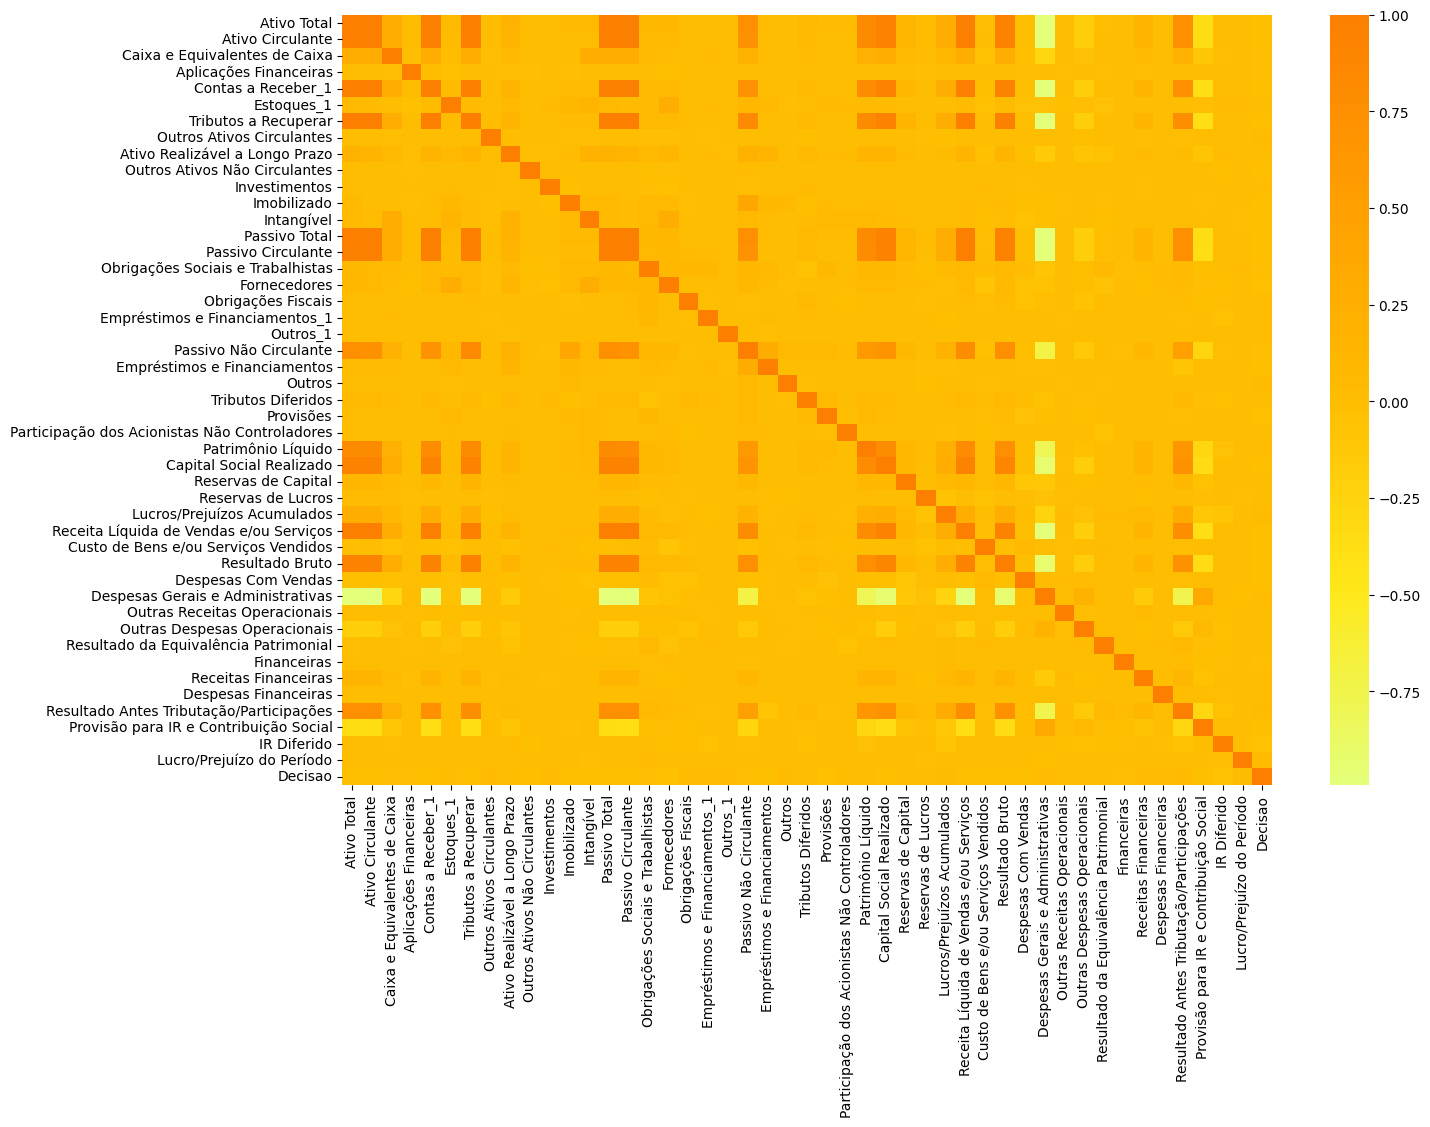

In [616]:
correlations = db.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlations, cmap="Wistia", ax=ax)
plt.show()


In [617]:
correlacoes_encontradas = []
for coluna in correlations:
    for linha in correlations.index:
        if linha != coluna:
            valor = abs(correlations.loc[linha, coluna])
            if valor > 0.8 and (coluna, linha, valor) not in correlacoes_encontradas:
                correlacoes_encontradas.append((linha, coluna, valor))
                print(f"Correlação Encontrada: {linha} e {coluna}. Valor: {valor}")

Correlação Encontrada: Ativo Circulante e Ativo Total. Valor: 0.9936191613034151
Correlação Encontrada: Contas a Receber_1 e Ativo Total. Valor: 0.9897286065598361
Correlação Encontrada: Tributos a Recuperar e Ativo Total. Valor: 0.9924646978752886
Correlação Encontrada: Passivo Total e Ativo Total. Valor: 1.0
Correlação Encontrada: Passivo Circulante e Ativo Total. Valor: 0.9856898107136647
Correlação Encontrada: Patrimônio Líquido e Ativo Total. Valor: 0.8121568265673591
Correlação Encontrada: Capital Social Realizado e Ativo Total. Valor: 0.9407784719550583
Correlação Encontrada: Receita Líquida de Vendas e/ou Serviços e Ativo Total. Valor: 0.9914015343484051
Correlação Encontrada: Resultado Bruto e Ativo Total. Valor: 0.935774107887246
Correlação Encontrada: Despesas Gerais e Administrativas e Ativo Total. Valor: 0.9844249841100206
Correlação Encontrada: Contas a Receber_1 e Ativo Circulante. Valor: 0.9951710613031797
Correlação Encontrada: Tributos a Recuperar e Ativo Circulante. 

#### Vamos remover Todas as Colunas "já explicadas" pelo Ativo Total

In [618]:
remover = ['Ativo Circulante', 'Contas a Receber_1', 'Tributos a Recuperar', 'Passivo Total', 'Passivo Circulante', 'Patrimônio Líquido', 'Capital Social Realizado', 'Receita Líquida de Vendas e/ou Serviços', 'Resultado Bruto', 'Despesas Gerais e Administrativas']
base_dados = db.drop(remover, axis=1)

In [619]:
print(base_dados.shape)

(1882, 37)


### Vamos partir para Feature Selection

Será que todas essas features são importantes mesmo para o nosso modelo? Muitas features nem sempre é bom, se pudermos reduzir sem perder eficiência do nosso modelo, melhor

Aqui temos 2 alternativas:

1. Seguir com todas as features e depois tentar melhorar o nosso modelo
2. Usar algum critério para selecionar as melhores features para prever e criar o modelo a partir apenas dessa seleção menor de features

Vou seguir com a opção 2, porque é mais rápida e, caso dê certo, facilita a nossa vida. Se der errado, a gente volta aqui e refaz o processo

In [620]:
base_dados.count()

Ativo Total                                      1882
Caixa e Equivalentes de Caixa                    1882
Aplicações Financeiras                           1508
Estoques_1                                       1502
Outros Ativos Circulantes                        1771
Ativo Realizável a Longo Prazo                   1882
Outros Ativos Não Circulantes                    1881
Investimentos                                    1673
Imobilizado                                      1881
Intangível                                       1857
Obrigações Sociais e Trabalhistas                1640
Fornecedores                                     1793
Obrigações Fiscais                               1850
Empréstimos e Financiamentos_1                   1881
Outros_1                                         1831
Passivo Não Circulante                           1882
Empréstimos e Financiamentos                     1879
Outros                                           1805
Tributos Diferidos          

In [621]:
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier(random_state=1)
x = base_dados.drop("Decisao", axis=1)
y = base_dados["Decisao"]
modelo.fit(x, y)

caracteristicas_importantes = pd.DataFrame(modelo.feature_importances_, x.columns).sort_values(by=0, ascending=False)
display(caracteristicas_importantes)
top10 = list(caracteristicas_importantes.index)[:10]
print(top10)

ValueError: Input X contains NaN.
ExtraTreesClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Aplicação do StandardScaler para melhorar nossos modelos de MachineLearning

In [ ]:
from sklearn.preprocessing import StandardScaler

def ajustar_scaler(tabela_original):
    scaler = StandardScaler()
    tabela_auxiliar = tabela_original.drop("Decisao", axis=1)
    
    tabela_auxiliar = pd.DataFrame(scaler.fit_transform(tabela_auxiliar), tabela_auxiliar.index, tabela_auxiliar.columns)
    tabela_auxiliar["Decisao"] = tabela_original["Decisao"]
    return tabela_auxiliar

nova_base_dados = ajustar_scaler(base_dados)
top10.append("Decisao") 

nova_base_dados = nova_base_dados[top10].reset_index(drop=True)
display(nova_base_dados)

,Outras Despesas Operacionais,Obrigações Fiscais,Resultado da Equivalência Patrimonial,Estoques_1,Tributos Diferidos,Outros Ativos Circulantes,Empréstimos e Financiamentos_1,Lucro/Prejuízo do Período,Outros Ativos Não Circulantes,Fornecedores,Decisao,Decisao
0,0.033492,-0.051695,-0.111842,-0.074388,-0.067647,-0.034581,-0.064318,-0.031683,-0.022904,-0.239103,2,2
1,0.033492,-0.108331,-0.795305,-0.432762,-0.434649,0.091844,-0.099954,-0.045837,-0.040733,-0.940311,0,0
2,0.033492,-0.051175,0.029751,-0.059989,-0.038615,-0.040775,-0.091160,-0.033126,-0.027530,-0.057234,0,0
3,0.033492,-0.046538,0.038263,-0.132883,-0.017393,-0.034488,-0.084554,-0.031589,-0.026173,-0.136565,2,2
4,0.033492,-0.052185,-0.275078,-0.041461,-0.061314,-0.036487,-0.049018,-0.034206,-0.022032,-0.124850,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1877,0.089821,-0.055773,NaN,-0.147790,0.049869,-0.034986,-0.070213,-0.033590,6.220073,-0.153682,2,2
1878,0.089821,-0.046408,NaN,-1.457568,0.024360,0.049581,-0.094142,-0.033433,-0.072216,0.171925,0,0
1879,0.033492,-0.107177,NaN,-1.457568,-0.034786,-0.033235,0.074490,-0.034249,-0.072216,-0.729482,2,2
1880,0.071944,0.058754,NaN,-1.457568,-0.140020,-0.035434,-0.056587,-0.036651,-0.072216,0.002308,2,2


### Separação dos dados em treino e teste

In [ ]:
fundaments3 = fundaments.copy()
for company in fundaments3:
    fundaments3[company].dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

x = nova_base_dados.drop("Decisao", axis=1)
y = nova_base_dados["Decisao"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=1)

### Criação de um Dummy Classifier (Uma baseline para ver se os nossos modelos são melhores do que puro chute)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

dummy = DummyClassifier(strategy="stratified", random_state=2)
dummy.fit(x_treino, y_treino)
previsao_dummy = dummy.predict(x_teste)

### Métricas de Avaliação

- Precisão vai ser nossa métrica principal
- Recall pode ser útil, mas precisão no caso de ações é mt mais importante.

Explicação: Foto dos Gatos e Cachorros na Wikipedia: https://en.wikipedia.org/wiki/Precision_and_recall

In [ ]:
def avaliar(y_teste, previsoes, nome_modelo):
    print(nome_modelo)
    report = classification_report(y_teste, previsoes)
    print(report)
    cf_matrix = pd.DataFrame(confusion_matrix(y_teste, previsoes), index=["Vender", "Comprar"], columns=["Vender", "Comprar"])
    sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt=',')
    plt.show()
    print("#" * 50)
    
    
avaliar(y_teste, previsao_dummy, "Dummy")

### Modelos que vamos testar
- AdaBoost
- Decision Tree
- Random Forest
- ExtraTree
- Gradient Boost
- K Nearest Neighbors (KNN)
- Logistic Regression
- Naive Bayes
- Support Vector Machine (SVM)
- Rede Neural

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

modelos = {
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=1),
    "RandomForest": RandomForestClassifier(random_state=1),
    "ExtraTree": ExtraTreesClassifier(random_state=1),
    "GradientBoost": GradientBoostingClassifier(random_state=1),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(random_state=1),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(random_state=1),
    "RedeNeural": MLPClassifier(random_state=1, max_iter=400),
}

In [ ]:
for nome_modelo in modelos:
    modelo = modelos[nome_modelo]
    modelo.fit(x_treino, y_treino)
    previsoes = modelo.predict(x_teste)
    avaliar(y_teste, previsoes, nome_modelo)
    modelos[nome_modelo] = modelo

### Agora vamos ao tunning do modelo

- é bom sempre incluir no tuning os parâmetros "padrões" do modelo, se não poder ser que vc só encontre resultados piores

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score

modelo_final = modelos["RandomForest"]

n_estimators = range(10, 251, 30)
max_features = list(range(2, 11, 2))
max_features.append('auto')
min_samples_split = range(2, 11, 2)

precision2_score = make_scorer(precision_score, labels=[2], average='macro')

grid = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'n_estimators': n_estimators,
            'max_features': max_features,
            'min_samples_split': min_samples_split,
            'random_state': [1],
        },
        scoring=precision2_score,
)

resultado_grid = grid.fit(x_treino, y_treino)
print("Ajuste feito")

Ajuste feito


/Users/cassio/Documents/Investiments - Final/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


225 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/cassio/Documents/Investiments - Final/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/cassio/Documents/Investiments - Final/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/cassio/Documents/Investiments - Final/.venv/lib/python3

RandomForest Tunado
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        62
           2       0.47      0.59      0.52        39

    accuracy                           0.58       101
   macro avg       0.58      0.59      0.58       101
weighted avg       0.61      0.58      0.59       101



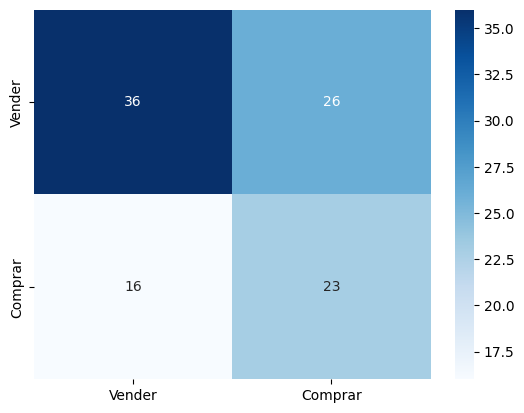

##################################################


In [ ]:
modelo_tunado = resultado_grid.best_estimator_
previsoes = modelo_tunado.predict(x_teste)
avaliar(y_teste, previsoes, "RandomForest Tunado")

### Vamos seguir então com o Modelo BLA tunado para ser o nosso modelo

- Agora ao que interessa...será que vamos conseguir escolher boas ações e ter uma carteira rentável?
- Para isso, temos que pegar o último Trimestre (que não usamos para treinar o modelo nem testar) e ver como ele teria saído até o momento em que gravo esse vídeo...

### Repetindo os passos com a base fundamentos só que pegando apenas o último tri de cada empresa

In [ ]:
ult_tri_fundamentos = fundaments.copy()
ult_tri_base_dados = pd.DataFrame()
lista_empresas = []
for empresa in ult_tri_fundamentos:
    ult_tri_fundamentos[empresa] = ult_tri_fundamentos[empresa][-1:]
    ult_tri_fundamentos[empresa] = ult_tri_fundamentos[empresa].reset_index(drop=True)
    ult_tri_base_dados = pd.concat([ult_tri_base_dados, (ult_tri_fundamentos[empresa])])
    lista_empresas.append(empresa)
display(ult_tri_base_dados)
print(lista_empresas)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Outros Ativos Não Circulantes,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Decisao
0,0.031680,0.110779,0.470028,0.175440,0.003098,-0.039879,-0.095753,-0.096427,0.030171,-1.00000,...,-1.000000,-1.000000,0.746183,0.240140,0.203302,0.253790,1.000000,-1.000000,0.738361,0
0,0.074712,0.194076,0.110385,0.213344,0.464883,0.035834,-0.030303,0.272727,-0.043798,-1.00000,...,-1.000000,0.969590,1.000000,3.423529,0.273381,1.022587,0.811594,-3.933333,1.052691,0
0,0.110752,0.149299,-0.190137,5.684499,0.142603,NaN,0.141692,-1.000000,0.002725,-1.00000,...,1.000000,-1.000000,0.732078,0.012978,0.076574,1.355406,0.116026,-0.345881,1.969185,0
0,-0.037219,0.115716,0.915054,-0.329795,0.951245,-0.414487,-0.125977,-0.434265,0.151296,-1.00000,...,1.000000,NaN,1.000000,0.576447,0.163892,1.000000,-4.390511,1.000000,1.000000,0
0,0.017196,-0.297213,-0.499392,-1.000000,0.039584,NaN,0.031846,-0.091211,0.098226,-1.00000,...,-7.738313,0.714149,-0.617254,-0.451580,-0.529522,0.347462,1.000000,-0.718603,0.311853,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.021032,0.060388,0.114767,0.054163,0.191414,NaN,0.097072,-0.601857,0.047464,-1.00000,...,0.813033,0.236324,1.000000,0.397435,0.653082,0.040481,-0.796482,0.024238,-0.034832,0
0,-0.013653,-0.038666,0.512342,-0.095943,0.097290,-0.227625,-0.103594,-0.496420,-0.102374,-1.00000,...,-3.192411,0.270548,-0.176207,-0.119356,-0.108965,-0.209368,0.479930,1.000000,0.056169,0
0,0.060034,0.104079,0.466758,NaN,0.073073,0.076078,-0.326109,1.000000,0.059086,-1.00000,...,-22.638342,0.177247,0.011798,0.389843,-0.033645,-0.024755,-0.007515,1.749831,0.045235,0
0,-0.004568,-0.144531,-0.310447,NaN,-0.022350,0.216183,-0.125387,-0.060282,-0.001100,-0.11284,...,0.265281,-0.151625,-16.417323,-0.548024,-0.069133,0.094810,1.000000,-0.284516,0.067110,0


['MRFG3', 'ITSA4', 'CIEL3', 'PRIO3', 'TAEE11', 'BRAP4', 'JBSS3', 'MGLU3', 'PETR4', 'CYRE3', 'YDUQ3', 'GOLL4', 'SBSP3', 'MULT3', 'ECOR3', 'MRVE3', 'EZTC3', 'CCRO3', 'BRML3', 'ELET6', 'VALE3', 'ABEV3', 'HYPE3', 'SUZB3', 'EQTL3', 'BEEF3', 'BRKM5', 'ENBR3', 'CPFE3', 'JHSF3', 'RENT3', 'SULA11', 'CSNA3', 'GOAU4', 'WEGE3', 'BRFS3', 'USIM5', 'ENGI11', 'COGN3', 'LAME4', 'ENEV3', 'VVAR3', 'CPLE6', 'IGTA3', 'PCAR3', 'HGTX3', 'TOTS3', 'UGPA3', 'EGIE3', 'GGBR4', 'LREN3', 'CSAN3', 'QUAL3', 'EMBR3', 'BTOW3', 'CMIG4', 'B3SA3', 'FLRY3', 'RADL3', 'VIVT3', 'LCAM3']


In [ ]:
ult_tri_base_dados = ult_tri_base_dados.reset_index(drop=True)
ult_tri_base_dados = ult_tri_base_dados[top10]
ult_tri_base_dados = ajustar_scaler(ult_tri_base_dados)
ult_tri_base_dados = ult_tri_base_dados.drop("Decisao", axis=1)
display(ult_tri_base_dados)

In [ ]:
previsoes_ult_tri = modelo_tunado.predict(ult_tri_base_dados)
print(previsoes_ult_tri)

carteira = []
carteira_inicial = []

for i, empresa in enumerate(ult_tri_fundamentos):
    print(empresa)
    if previsoes_ult_tri[i] == 2:
        carteira_inicial.append(1000)
        cotacao = stock_values[empresa]
        cotacao = cotacao.set_index("Date")
        cotacao_inicial = cotacao.loc["2020-12-31", "Adj Close"]
        cotacao_final = cotacao.loc["2021-03-31", "Adj Close"]
        percentual = cotacao_final / cotacao_inicial
        carteira.append(1000 * percentual)
        
saldo_inicial = sum(carteira_inicial)
saldo_final = sum(carteira)
print(saldo_inicial, saldo_final)
print(saldo_final / saldo_inicial)

[0 2 0 0 0 2 0 2 2 2 0 0 2 2 0 0 2 0 2]
MRFG3
ITSA4
CIEL3
PRIO3
TAEE11
BRAP4
JBSS3
MGLU3
PETR4
CYRE3
YDUQ3
GOLL4
SBSP3
MULT3
ECOR3
MRVE3
EZTC3
CCRO3
BRML3
ELET6


IndexError: index 19 is out of bounds for axis 0 with size 19

### Agora fazemos a previsão de decisões

In [ ]:
variacao_ibov = ibov_df.loc["2021-03-31", "IBOV"] / ibov_df.loc["2020-12-31", "IBOV"]
print(variacao_ibov)

0.9776038086936114


In [ ]:
0.9890493140740175/0.9776038086936114









1.0117077135733554